In [20]:
%load_ext autoreload
# %reload_ext autoreload

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [52]:
import os
import pandas as pd
from pycaret.time_series import TSForecastingExperiment
import numpy as np
import matplotlib.pylab as plt
from pycaret.regression import *
from pathlib import Path
pd.set_option('display.max_rows', 200)
pd.set_option('display.max_columns', None)

In [53]:
# from pycaret.utils import version
# version()

In [54]:
%autoreload
import sys
sys.path.append('../')
from pipeline import Pipin
pipin = Pipin()

Current working directory: /Users/matsalexander/Desktop/Forest Gump/mats/pycret


In [24]:
df_0 = pipin.get_combined_datasets(consecutive_threshold=3)

In [47]:
df = df_0.copy()
print(df.shape)
df.head(15)

(44536, 53)


,time,absolute_humidity_2m:gm3,air_density_2m:kgm3,ceiling_height_agl:m,clear_sky_energy_1h:J,clear_sky_rad:W,cloud_base_agl:m,dew_or_rime:idx,dew_point_2m:K,diffuse_rad:W,diffuse_rad_1h:J,direct_rad:W,direct_rad_1h:J,effective_cloud_cover:p,elevation:m,fresh_snow_12h:cm,fresh_snow_1h:cm,fresh_snow_24h:cm,fresh_snow_3h:cm,fresh_snow_6h:cm,is_day:idx,is_in_shadow:idx,msl_pressure:hPa,precip_5min:mm,precip_type_5min:idx,pressure_100m:hPa,pressure_50m:hPa,prob_rime:p,rain_water:kgm2,relative_humidity_1000hPa:p,sfc_pressure:hPa,snow_density:kgm3,snow_depth:cm,snow_drift:idx,snow_melt_10min:mm,snow_water:kgm2,sun_azimuth:d,sun_elevation:d,super_cooled_liquid_water:kgm2,t_1000hPa:K,total_cloud_cover:p,visibility:m,wind_speed_10m:ms,wind_speed_u_10m:ms,wind_speed_v_10m:ms,wind_speed_w_1000hPa:ms,date_calc,estimated,observed,A,B,C,pv_measurement
0,2019-06-02 22:00:00,7.7,1.230,1744.900024,0.000000e+00,0.000000,1744.900024,0.0,280.299988,0.000000,0.000000,0.000000,0.000000e+00,98.699997,6.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1006.799988,0.0,0.0,994.200012,1000.299988,0.0,0.0,73.099998,1006.299988,NaN,0.0,0.0,-0.0,0.1,342.834015,-3.202000,0.0,285.899994,100.000000,39640.101562,3.7,-3.6,-0.8,-0.0,NaT,0,1,1,0,0,0.00
1,2019-06-02 23:00:00,7.7,1.225,1703.599976,0.000000e+00,0.000000,1703.599976,0.0,280.299988,0.000000,0.000000,0.000000,0.000000e+00,99.599998,6.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1005.500000,0.0,0.0,993.000000,999.000000,0.0,0.0,69.199997,1005.000000,NaN,0.0,0.0,-0.0,0.2,356.742004,-4.393000,0.0,286.799988,100.000000,41699.898438,3.5,-3.5,0.0,-0.0,NaT,0,1,1,0,0,0.00
2,2019-06-03 00:00:00,7.7,1.221,1668.099976,0.000000e+00,0.000000,1668.099976,0.0,280.200012,0.000000,0.000000,0.000000,0.000000e+00,100.000000,6.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1004.599976,0.0,0.0,992.099976,998.099976,0.0,0.1,66.000000,1004.099976,NaN,0.0,0.0,-0.0,0.2,9.741000,-3.910000,0.0,287.000000,100.000000,20473.000000,3.2,-3.1,0.7,-0.0,NaT,0,1,1,0,0,0.00
3,2019-06-03 01:00:00,8.2,1.218,1388.400024,0.000000e+00,0.000000,1388.400024,0.0,281.299988,0.000000,0.000000,0.000000,0.000000e+00,100.000000,6.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1004.400024,0.0,0.0,991.799988,997.799988,0.0,0.2,71.099998,1003.799988,NaN,0.0,0.0,-0.0,0.7,23.541000,-1.986000,0.0,286.899994,100.000000,2104.600098,2.8,-2.7,0.8,-0.0,NaT,0,1,1,0,0,0.00
4,2019-06-03 02:00:00,8.8,1.219,1108.500000,6.546900e+03,9.800000,1108.500000,0.0,282.299988,4.300000,7743.299805,0.000000,0.000000e+00,100.000000,6.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1003.400024,0.0,0.0,990.900024,996.900024,0.0,0.1,78.500000,1002.900024,NaN,0.0,0.0,-0.0,0.3,37.040001,1.401000,0.0,286.500000,100.000000,2681.600098,2.7,-2.5,1.0,-0.0,NaT,0,1,1,0,0,19.36
5,2019-06-03 03:00:00,9.1,1.217,828.599976,1.022259e+05,53.900002,828.599976,0.0,282.899994,29.100000,60137.601562,1.800000,3.158300e+03,58.799999,6.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1002.599976,0.0,0.0,989.900024,995.900024,0.0,0.0,82.400002,1001.900024,NaN,0.0,0.0,-0.0,0.1,50.193001,6.033000,0.0,286.399994,96.500000,26617.699219,2.3,-2.2,0.9,-0.0,NaT,0,1,1,0,0,251.02
6,2019-06-03 04:00:00,9.4,1.215,777.200012,3.432068e+05,143.500000,777.200012,0.0,283.299988,72.599998,183108.000000,24.500000,4.716980e+04,76.199997,6.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1002.000000,0.0,0.0,989.400024,995.400024,0.0,0.0,83.500000,1001.400024,NaN,0.0,0.0,-0.0,0.0,63.087002,11.640000,0.0,286.600006,93.699997,35188.300781,2.4,-2.3,0.6,-0.0,NaT,0,1,1,0,0,263.78
7,2019-06-03 05:00:00,9.7,1.209,725.299988,7.252346e+05,262.700012,725.299988,0.0,283.799988,120.800003,348172.812500,57.000000,1.465457e+05,79.699997,6.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1001.500000,0.0,0.0,989.000000,994.900024,0.0,0.0,80.199997,1000.799988,NaN,0.0,0.0,-0.0,0.0,75.935997,17.927000,0.0,287.100006,97.300003,37301.101562,2.3,-2.0,1.0,-0.0,NaT,0,1,1,0,0,522.72
8,2019-06-03 06:00:00,9.7,1.204,672.799988,1.180469e+06,393.799988,672.799988,0.0,283.799988,159.199997,503999.687500,43.400002,1.807109e+05,94.599998,6.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1000.599976,0.0,0.0,988.200

In [26]:
# selected_feature = pipin.get_features_selection(df)
# df = df[selected_feature]
# ignore_features = pipin.get_irrelevant_features(df, feature_selection=True) #+ to_ignore
# categorical_features = pipin.get_categorical_features(df, feature_selection=True)
ignore_features = pipin.get_irrelevant_features(df)
categorical_features = pipin.get_categorical_features(df)


In [27]:
# s = setup(df_transformed, target="pv_measurement", normalize=False, categorical_features=categorical_features, experiment_name="pv_power_mw", ignore_features=ignore_features, index=False)
s = setup(df, target="pv_measurement", normalize=False, categorical_features=categorical_features, date_features=["time"], experiment_name="pv_power_mw", ignore_features=ignore_features, index=False, fold_shuffle=True)
# s = setup(df, target="pv_measurement", normalize=False, categorical_features=categorical_features, experiment_name="pv_power_mw", ignore_features=ignore_features, index=False, fold_shuffle=True, feature_selection=True, feature_selection_estimator="et", n_features_to_select=30)
# s = setup(df, target="pv_measurement", normalize=False, categorical_features=categorical_features, experiment_name="pv_power_mw", ignore_features=ignore_features, index=False, imputation_type="iterative", feature_selection="classic", feature_selection_estimator="et", remove_multicollinearity=True, remove_outliers = True, low_variance_threshold = 0.1,)
# s = setup(df, target="pv_measurement", imputation_type="iterative", feature_selection="classic", feature_selection_estimator="et", remove_multicollinearity=True, remove_outliers = True, low_variance_threshold = 0.1,  normalize=False, categorical_features=categorical_features, experiment_name="pv_power_mw", ignore_features=ignore_features, index=False,)

,Description,Value
0,Session id,603
1,Target,pv_measurement
2,Target type,Regression
3,Original data shape,"(44536, 53)"
4,Transformed data shape,"(44536, 60)"
5,Transformed train set shape,"(31175, 60)"
6,Transformed test set shape,"(13361, 60)"
7,Ignore features,1
8,Ordinal features,2
9,Numeric features,45


In [28]:
preprocessed_data = s.dataset_transformed
preprocessed_data
print(preprocessed_data.shape)
# print (preprocessed_data.columns)
preprocessed_data.tail(20)

(44536, 60)


,time_year,time_month,time_day,absolute_humidity_2mgm3,air_density_2mkgm3,ceiling_height_aglm,clear_sky_energy_1hJ,clear_sky_radW,cloud_base_aglm,dew_or_rimeidx_0.0,...,wind_speed_10mms,wind_speed_u_10mms,wind_speed_v_10mms,wind_speed_w_1000hPams,estimated,observed,A,B,C,pv_measurement
44516,2021,6,20,8.0,1.209,5463.299805,2.921380e+06,788.200012,2780.399902,1.0,...,3.1,-2.4,-1.9,0.0,0.0,1.0,0.0,1.0,0.0,556.312500
44517,2022,3,17,4.5,1.282,5555.299805,9.648100e+03,16.200001,4266.399902,1.0,...,2.6,-2.0,1.7,-0.0,0.0,1.0,0.0,1.0,0.0,7.762500
44518,2020,2,12,4.6,1.233,1015.900024,1.745560e+05,21.799999,1015.900024,1.0,...,4.3,3.8,1.9,-0.0,0.0,1.0,0.0,0.0,1.0,9.800000
44519,2020,1,18,4.7,1.267,1491.400024,1.454000e+03,0.000000,1491.400024,1.0,...,2.1,0.3,2.1,-0.0,0.0,1.0,1.0,0.0,0.0,0.000000
44520,2020,5,5,4.0,1.261,5288.299805,2.159688e+06,645.200012,1296.500000,1.0,...,4.1,3.3,2.3,-0.0,0.0,1.0,1.0,0.0,0.0,1746.800049
44521,2020,10,18,5.8,1.266,1754.800049,3.873460e+04,0.000000,90.099998,1.0,...,5.3,4.6,-2.7,0.0,0.0,1.0,0.0,1.0,0.0,0.000000
44522,2021,6,1,8.6,1.193,11594.200195,9.666177e+05,205.500000,10717.500000,1.0,...,1.6,1.1,-1.2,0.0,0.0,1.0,0.0,1.0,0.0,141.449997
44523,2019,6,12,8.7,1.211,3951.399902,2.504610e+06,739.799988,3951.399902,1.0,...,3.0,-2.3,1.8,-0.0,0.0,1.0,1.0,0.0,0.0,1770.119995
44524,2023,3,31,2.5,1.280,3018.765625,1.830006e+06,522.400024,1796.356445,1.0,...,3.2,-2.3,-2.3,0.0,1.0,0.0,0.0,1.0,0.0,655.565247
44525,2020,9,10,7.4,1.239,9300.000000,1.911069e+06,522.400024,183.899994,1.0,...,5.5,5.3,1.6,-0.0,0.0,1.0,0.0,0.0,1.0,303.799988


In [29]:
modeller = models()
modell_navn = pd.DataFrame(modeller)
# modell_navn = modell_navn["ID"]
navn = list(modell_navn.index)
navn

['lr',
 'lasso',
 'ridge',
 'en',
 'lar',
 'llar',
 'omp',
 'br',
 'ard',
 'par',
 'ransac',
 'tr',
 'huber',
 'kr',
 'svm',
 'knn',
 'dt',
 'rf',
 'et',
 'ada',
 'gbr',
 'mlp',
 'xgboost',
 'lightgbm',
 'dummy']

In [31]:
top3 = compare_models(n_select=3, sort='MAE')
# lightgmb = create_model('lightgbm', sort='MAE')


,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,13:58:45
Status,. . . . . . . . . . . . . . . . . .,Loading Dependencies
Estimator,. . . . . . . . . . . . . . . . . .,Compiling Library


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
et,Extra Trees Regressor,168.1634,133231.0811,364.6792,0.8716,0.7373,1.7016,2.4780
rf,Random Forest Regressor,172.5326,140273.5021,374.1833,0.8648,0.7452,1.8096,6.7050
lightgbm,Light Gradient Boosting Machine,173.2135,131178.5302,361.9471,0.8736,1.0624,6.5072,1.0720
xgboost,Extreme Gradient Boosting,178.7200,133629.2820,365.3633,0.8712,1.2649,3.8498,0.2500
gbr,Gradient Boosting Regressor,206.0712,163404.0235,403.8332,0.8425,1.5286,7.0616,3.0100
dt,Decision Tree Regressor,233.9852,282728.2431,531.4567,0.7274,0.9296,1.8360,0.2470
ada,AdaBoost Regressor,311.2408,243642.2965,493.3613,0.7652,2.0989,30.1456,0.7260
huber,Huber Regressor,433.9449,902072.9322,949.5632,0.1319,1.5615,9.0026,0.2320
lr,Linear Regression,460.4842,390758.0116,625.0056,0.6236,2.4988,100.0685,0.3250
ridge,Ridge Regression,460.9561,391625.1945,625.6997,0.6228,2.5023,97.5299,0.0760


In [ ]:
# lightgbm = s.tune_model(lightgbm, optimize="MAE")

In [ ]:
# extra_trees = top3[0]
# tune_model = tune_model(extra_trees, optimize="MAE")
# extra_trees = finalize_model(extra_trees)

In [48]:
# gump = create_model("et")
# evaluate_model(extra_trees)

In [49]:
# gump = finalize_model(gump)

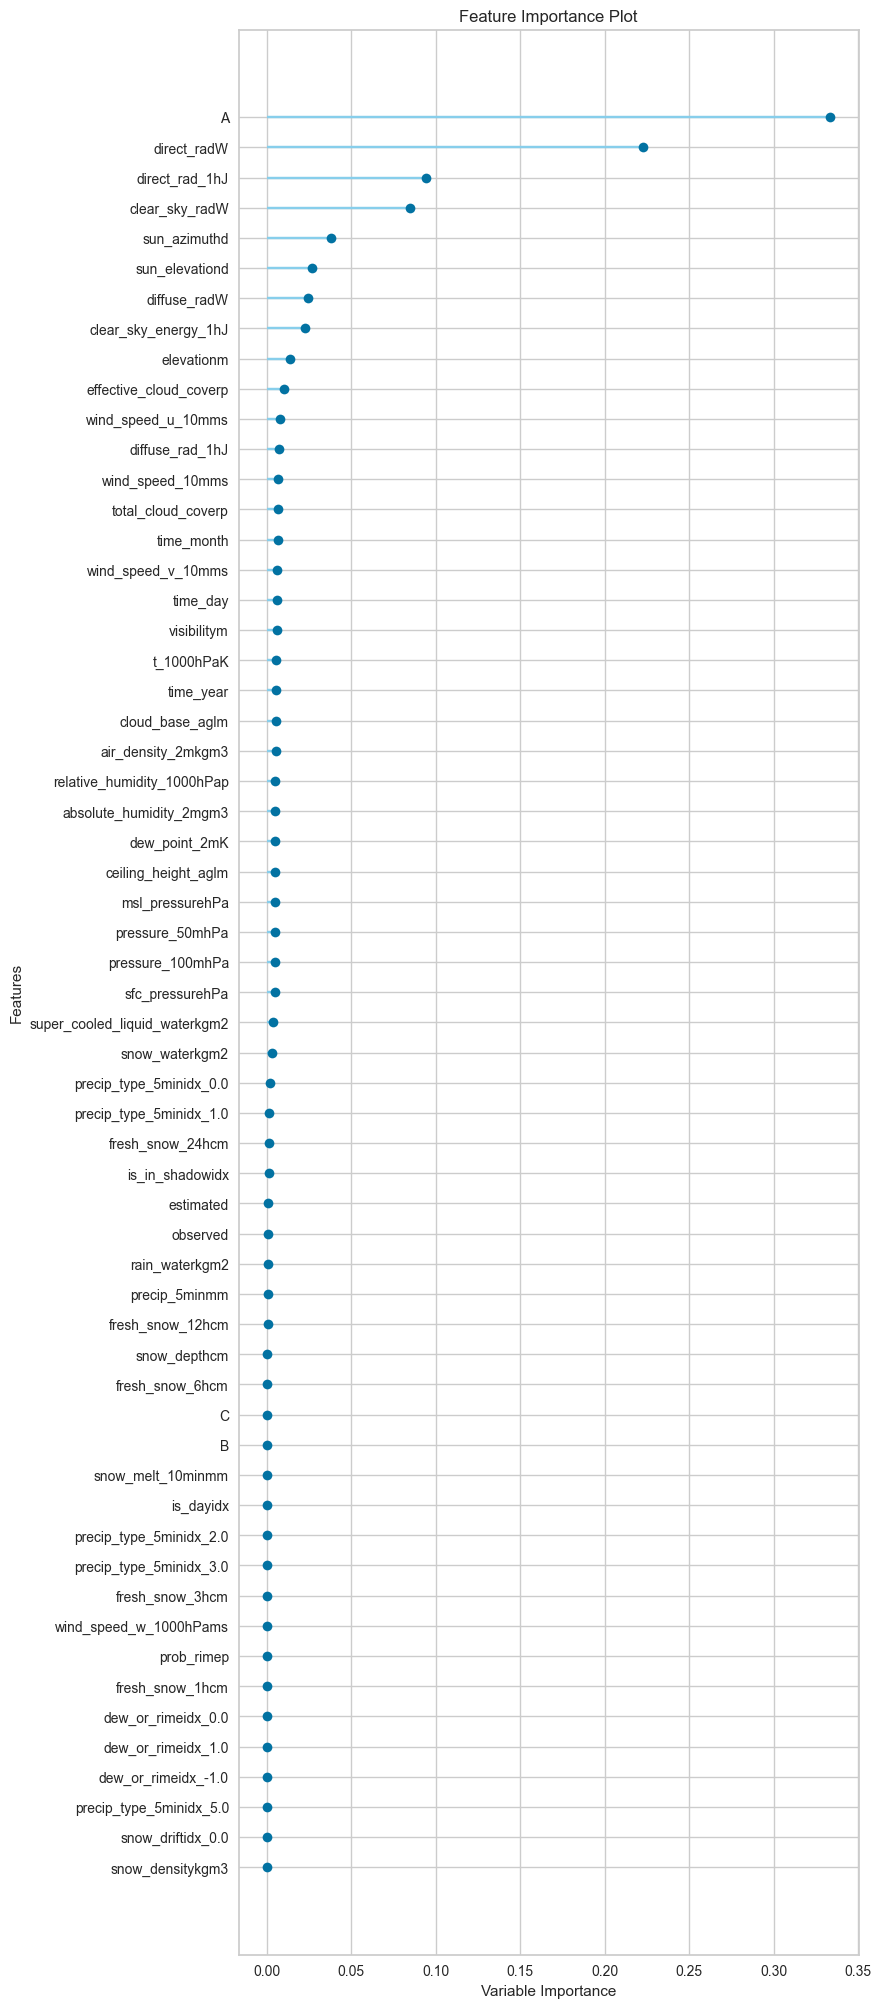

In [32]:
plot_model(top3[0], plot="feature_all")
# plot_model(gump, plot="feature_all")

In [55]:
test_data = pipin.get_combined_test_data()

In [56]:
tdf = pipin.get_test_data("A")
tdf

,time,absolute_humidity_2m:gm3,air_density_2m:kgm3,ceiling_height_agl:m,clear_sky_energy_1h:J,clear_sky_rad:W,cloud_base_agl:m,dew_or_rime:idx,dew_point_2m:K,diffuse_rad:W,diffuse_rad_1h:J,direct_rad:W,direct_rad_1h:J,effective_cloud_cover:p,elevation:m,fresh_snow_12h:cm,fresh_snow_1h:cm,fresh_snow_24h:cm,fresh_snow_3h:cm,fresh_snow_6h:cm,is_day:idx,is_in_shadow:idx,msl_pressure:hPa,precip_5min:mm,precip_type_5min:idx,pressure_100m:hPa,pressure_50m:hPa,prob_rime:p,rain_water:kgm2,relative_humidity_1000hPa:p,sfc_pressure:hPa,snow_density:kgm3,snow_depth:cm,snow_drift:idx,snow_melt_10min:mm,snow_water:kgm2,sun_azimuth:d,sun_elevation:d,super_cooled_liquid_water:kgm2,t_1000hPa:K,total_cloud_cover:p,visibility:m,wind_speed_10m:ms,wind_speed_u_10m:ms,wind_speed_v_10m:ms,wind_speed_w_1000hPa:ms,estimated,observed,day_of_year,hour,month
0,2023-05-01 00:00:00,4.325,1.28675,912.700012,0.000000,0.000000,1061.550049,0.0,271.650024,0.000000,0.000000,0.000000,0.000000,74.949997,6.0,0.0,0.0,0.0,0.0,0.0,0.00,1.0,1013.674988,0.0,0.0,1000.549988,1006.799988,0.0,0.0,80.275002,1013.099976,NaN,0.0,0.0,0.0,0.0,16.026501,-10.54100,0.000,273.799988,74.949997,29907.500000,3.950,2.100,3.350,0.0,1.0,0.0,121,0,5
1,2023-05-01 01:00:00,4.275,1.28600,1482.099976,0.000000,0.000000,1075.100098,0.0,271.450012,0.000000,0.000000,0.000000,0.000000,77.474998,6.0,0.0,0.0,0.0,0.0,0.0,0.00,1.0,1013.150024,0.0,0.0,1000.049988,1006.299988,0.0,0.0,79.824997,1012.599976,NaN,0.0,0.0,0.0,0.0,30.497250,-7.89450,0.000,273.799988,77.474998,29519.074219,3.825,1.925,3.300,0.0,1.0,0.0,121,1,5
2,2023-05-01 02:00:00,4.150,1.28375,1791.300049,0.000000,0.000000,1200.400024,0.0,271.049988,0.000000,0.000000,0.000000,0.000000,88.099998,6.0,0.0,0.0,0.0,0.0,0.0,0.00,1.0,1012.674988,0.0,0.0,999.500000,1005.799988,0.0,0.0,78.000000,1012.049988,NaN,0.0,0.0,0.0,0.0,44.517250,-3.81550,0.000,273.849976,88.099998,31009.125000,3.650,1.750,3.200,0.0,1.0,0.0,121,2,5
3,2023-05-01 03:00:00,4.025,1.28200,2312.875000,10124.424805,11.675000,1179.849976,0.0,270.649994,9.375000,16845.226562,2.100000,3765.350098,68.599998,6.0,0.0,0.0,0.0,0.0,0.0,0.75,0.5,1012.174988,0.0,0.0,998.974976,1005.224976,0.0,0.0,75.625000,1011.525024,NaN,0.0,0.0,0.0,0.0,58.083000,1.41250,0.000,273.899994,68.599998,34552.500000,3.500,1.450,3.150,0.0,1.0,0.0,121,3,5
4,2023-05-01 04:00:00,3.900,1.28100,2198.299805,141748.593750,76.875000,920.049988,0.0,270.375000,47.400002,102209.703125,25.450001,49571.199219,66.300003,6.0,0.0,0.0,0.0,0.0,0.0,1.00,0.0,1011.724976,0.0,0.0,998.549988,1004.750000,0.0,0.0,74.224998,1011.049988,NaN,0.0,0.0,0.0,0.0,71.341003,7.46850,0.000,273.924988,66.300003,35483.875000,3.325,1.300,3.050,0.0,1.0,0.0,121,4,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
715,2023-07-03 19:00:00,8.350,1.19725,3638.899902,477093.187500,85.099998,2013.750000,0.0,281.575012,33.625000,168774.546875,13.425000,50963.250000,85.574997,6.0,0.0,0.0,0.0,0.0,0.0,1.00,0.0,992.099976,0.0,0.0,979.599976,985.424988,0.0,0.0,69.324997,991.325012,NaN,0.0,0.0,0.0,0.0,306.687012,8.15300,0.100,287.024994,86.150002,44056.375000,2.450,2.075,-1.350,0.0,1.0,0.0,184,19,7
716,2023-07-03 20:00:00,8.525,1.20050,3552.100098,184335.671875,24.799999,1610.900024,0.0,281.850006,14.325000,86321.125000,3.550000,30565.875000,74.599998,6.0,0.0,0.0,0.0,0.0,0.0,1.00,0.0,992.549988,0.0,0.0,980.025024,985.900024,0.0,0.0,72.900002,991.799988,NaN,0.0,0.0,0.0,0.0,319.704010,3.26800,0.000,286.600006,75.324997,44017.175781,2.450,2.100,-1.250,0.0,1.0,0.0,184,20,7
717,2023-07-03 21:00:00,8.825,1.20450,2315.000000,37429.328125,1.275000,1622.800049,0.0,282.325012,1.300000,28169.150391,0.000000,6409.899902,76.125000,6.0,0.0,0.0,0.0,0.0,0.0,0.25,1.0,992.900024,0.0,0.0,980.349976,986.250000,0.0,0.0,78.050003,992.150024,NaN,0.0,0.0,0.0,0.0,333.040009,-0.44325,0.000,286.100006,76.849998,43302.050781,2.575,2.150,-1.400,

In [57]:
from utils import get_unique_filename
res_stack = predict_model(top3[0], test_data)
res_stack = res_stack[["prediction_label"]].rename(columns={"prediction_label": "prediction"}).rename_axis(index="id")
# res_stack.to_csv(get_unique_filename('et_all'))
# save_model(extra_trees, model_name=get_unique_filename('stack_gbm_et_rf', "models"))


In [58]:
print("done", res_stack.shape)
pipin.compare_mae(res_stack)


done (2160, 1)


86.27755489168183